<a href="https://colab.research.google.com/github/ChuztpahNDA/DO_AN/blob/master/CKPLUS_finetune_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip '/content/drive/MyDrive/do an/thesis/CKPlus.zip' -d '/content/data'

Archive:  /content/drive/MyDrive/do an/thesis/CKPlus.zip
  inflating: /content/data/CK+48/anger/S010_004_00000017.png  
  inflating: /content/data/CK+48/anger/S010_004_00000018.png  
  inflating: /content/data/CK+48/anger/S010_004_00000019.png  
  inflating: /content/data/CK+48/anger/S011_004_00000019.png  
  inflating: /content/data/CK+48/anger/S011_004_00000020.png  
  inflating: /content/data/CK+48/anger/S011_004_00000021.png  
  inflating: /content/data/CK+48/anger/S014_003_00000028.png  
  inflating: /content/data/CK+48/anger/S014_003_00000029.png  
  inflating: /content/data/CK+48/anger/S014_003_00000030.png  
  inflating: /content/data/CK+48/anger/S022_005_00000030.png  
  inflating: /content/data/CK+48/anger/S022_005_00000031.png  
  inflating: /content/data/CK+48/anger/S022_005_00000032.png  
  inflating: /content/data/CK+48/anger/S026_003_00000013.png  
  inflating: /content/data/CK+48/anger/S026_003_00000014.png  
  inflating: /content/data/CK+48/anger/S026_003_00000015.png 

In [2]:
!cp '/content/drive/MyDrive/do an/thesis/train.py' 'train.py'
!unzip '/content/drive/MyDrive/do an/thesis/VGGFace2_DeepFace_weights_val-0.9034.h5.zip' -d '/content/'

Archive:  /content/drive/MyDrive/do an/thesis/VGGFace2_DeepFace_weights_val-0.9034.h5.zip
  inflating: /content/VGGFace2_DeepFace_weights_val-0.9034.h5  


In [3]:
# data
from glob import glob
from os.path import basename, dirname
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd
import seaborn as sns
from IPython.display import Image
import matplotlib.cm as cm

# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import SparseCategoricalAccuracy, Mean
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback, ReduceLROnPlateau

#sklearn
from sklearn.metrics import f1_score
# model
import train 

In [4]:
print('tensorflow',tf.__version__)
print('opencv', cv2.__version__)

tensorflow 2.4.1
opencv 4.1.2


In [5]:
train_paths = glob('/content/data/CK+48/*/*.png')

In [6]:
train_paths = np.array(train_paths)
np.random.shuffle(train_paths)
train_paths[:5]

array(['/content/data/CK+48/happy/S071_005_00000020.png',
       '/content/data/CK+48/surprise/S071_001_00000013.png',
       '/content/data/CK+48/surprise/S056_003_00000010.png',
       '/content/data/CK+48/fear/S502_004_00000051.png',
       '/content/data/CK+48/surprise/S071_001_00000011.png'], dtype='<U50')

In [7]:
dict_emotion = {
    'anger':0,
    'disgust':1,
    'fear':2,
    'happy':3,
    'sadness':4,
    'surprise':5,
    'contempt':6
}
X = [np.array(cv2.resize(cv2.imread(img), (152, 152), interpolation = cv2.INTER_AREA)) for img in train_paths]
Y = [dict_emotion[basename(dirname(path)).lower()] for path in train_paths]
# Y = [basename(dirname(path)).lower() for path in train_paths]


In [8]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    stratify=Y,
                                                    random_state=18,
                                                    test_size=0.3)

In [9]:
x_test, x_valid, y_test, y_valid = train_test_split(x_test,
                                                    y_test,
                                                    stratify=y_test,
                                                    random_state=18,
                                                    test_size=0.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Test')

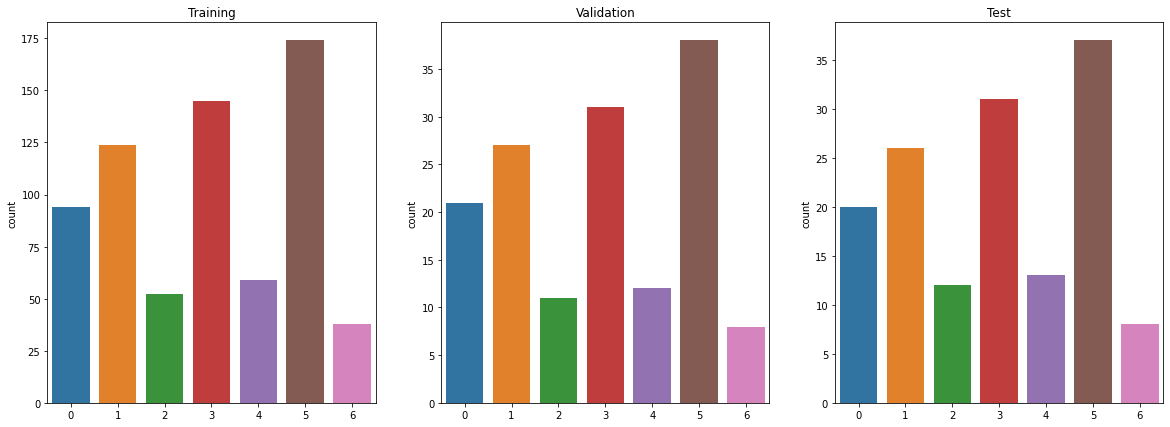

In [10]:
plt.figure(figsize = (20, 7))
plt.subplot(1, 3, 1)
sns.countplot(y_train);
plt.title("Training")

plt.subplot(1, 3, 2)
sns.countplot(y_valid);
plt.title("Validation")

plt.subplot(1, 3, 3)
sns.countplot(y_test);
plt.title("Test")

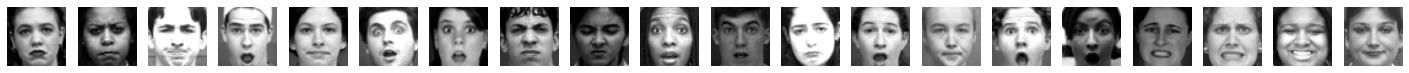

In [11]:
plt.figure(figsize=(25,15))
for i in range(20):
  plt.subplot(1, 20, i+1)
  plt.imshow(x_train[i])
  plt.axis('off')

validation


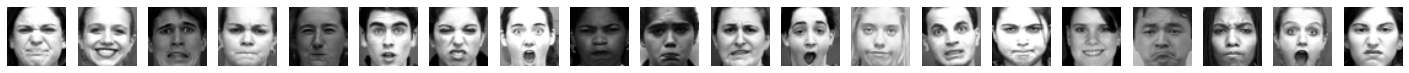

In [12]:
print("validation")
plt.figure(figsize=(25,15))
for i in range(20):
  plt.subplot(1, 20, i+1)
  plt.imshow(x_valid[i])
  plt.axis('off')

Test


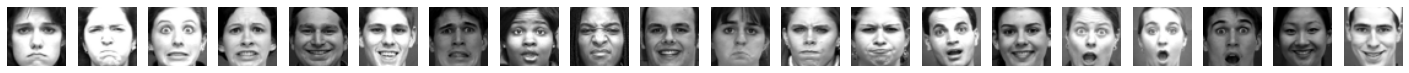

In [13]:
print("Test")
plt.figure(figsize=(25,15))
for i in range(20):
  plt.subplot(1, 20, i+1)
  plt.imshow(x_test[i])
  plt.axis('off')

In [14]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_valid = np.array(x_valid)/255.0
y_valid = np.array(y_valid)

x_test = np.array(x_test)/255.0
y_test = np.array(y_test)

print("train", x_train.shape, y_train.shape)
print("valid", x_valid.shape, y_valid.shape)
print("test", x_test.shape, y_test.shape)


train (686, 152, 152, 3) (686,)
valid (148, 152, 152, 3) (148,)
test (147, 152, 152, 3) (147,)


In [15]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True
)

train_datagen.fit(x_train)

In [16]:
deepface_base = train.create_model()
deepface_base.load_weights('/content/VGGFace2_DeepFace_weights_val-0.9034.h5')

Model: "DeepFace"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 142, 142, 32)      11648     
_________________________________________________________________
M2 (MaxPooling2D)            (None, 71, 71, 32)        0         
_________________________________________________________________
C3 (Conv2D)                  (None, 63, 63, 16)        41488     
_________________________________________________________________
L4 (LocallyConnected2D)      (None, 55, 55, 16)        62774800  
_________________________________________________________________
L5 (LocallyConnected2D)      (None, 25, 25, 16)        7850000   
_________________________________________________________________
L6 (LocallyConnected2D)      (None, 21, 21, 16)        2829456   
_________________________________________________________________
F0 (Flatten)                 (None, 7056)              0  

In [17]:
for layer in deepface_base.layers[:-6]:
  layer.trainable=False

In [18]:
#transfer model
x = deepface_base.get_layer('D0').output
weight_deecay = Dense(1024, activation='relu', name = 'weight_decay_01', bias_regularizer=regularizers.l1(l1=1e-1))(x)
weight_deecay = Dropout(0.2)(weight_deecay)
output = Dense(7, activation='softmax', name='Prediction')(weight_deecay)

model = Model(inputs=deepface_base.input, outputs = output, name='Facial')
model.summary()

Model: "Facial"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
I0 (InputLayer)              [(None, 152, 152, 3)]     0         
_________________________________________________________________
C1 (Conv2D)                  (None, 142, 142, 32)      11648     
_________________________________________________________________
M2 (MaxPooling2D)            (None, 71, 71, 32)        0         
_________________________________________________________________
C3 (Conv2D)                  (None, 63, 63, 16)        41488     
_________________________________________________________________
L4 (LocallyConnected2D)      (None, 55, 55, 16)        62774800  
_________________________________________________________________
L5 (LocallyConnected2D)      (None, 25, 25, 16)        7850000   
_________________________________________________________________
L6 (LocallyConnected2D)      (None, 21, 21, 16)        28294

In [19]:
class F1_score(Callback):
  def __init__(self, model, x_train, x_test, y_train, y_test, f1_logs={}):
    self.model = model
    self.x_train = x_train
    self.x_test = x_test
    self.y_train = y_train
    self.y_test = y_test
    self.f1_logs = f1_logs
    if 'f1_train' not in self.f1_logs:
      self.f1_logs['f1_train'] = []
    if 'f1_valid' not in self.f1_logs:
      self.f1_logs['f1_valid'] = []
  def on_epoch_end(self, epoch, logs=None):
    preds_train = np.argmax(self.model.predict(self.x_train), axis=1)
    preds_test = np.argmax(self.model.predict(self.x_test), axis=1)

    f1_train = f1_score(self.y_train, preds_train, average='macro')
    f1_test = f1_score(self.y_test, preds_test, average='macro')

    print("F1_train {} - F1_valid {}".format(f1_train, f1_test))




In [20]:
f1_param = {
    'model':model,
    'x_train':x_train,
    'x_test': x_test,
    'y_train':y_train,
    'y_test':y_test,
    'f1_logs':{}
}

In [21]:
%%time
n_epochs = 150
loss_fn = SparseCategoricalCrossentropy(from_logits=True)
optimizer = Adam(learning_rate=1e-4)
model.compile(loss=loss_fn, optimizer=optimizer)

es = EarlyStopping(monitor='val_loss', patience=5)
check_point = ModelCheckpoint(
    '/content/drive/MyDrive/Thesis/model_CKPlus_trainable.h5',
    monitor = 'val_loss',
    save_weights_only=True,
    save_best_only=True,
    mode='min'
)
f1_param['f1_logs'] = {}
f1_callback = F1_score(**f1_param)
lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1)
history_freeze = model.fit(train_datagen.flow(x_train, y_train, batch_size=32), 
                           epochs=n_epochs, 
                           validation_data=(x_valid, y_valid), 
                           callbacks=[es, check_point, f1_callback, lr])

Epoch 1/150
22/22 [==============================] - 148s 2s/step - loss: 2.5675 - val_loss: 0.6298
F1_train 0.6345809701969986 - F1_valid 0.659309909085291
Epoch 2/150
22/22 [==============================] - 4s 191ms/step - loss: 0.7272 - val_loss: 0.2627
F1_train 0.8778519767822128 - F1_valid 0.9157261684231283
Epoch 3/150
22/22 [==============================] - 4s 189ms/step - loss: 0.4109 - val_loss: 0.0924
F1_train 0.8841628411725152 - F1_valid 0.9373810130112652
Epoch 4/150
22/22 [==============================] - 4s 194ms/step - loss: 0.2167 - val_loss: 0.0810
F1_train 0.8824458959944991 - F1_valid 0.9858823529411765
Epoch 5/150
22/22 [==============================] - 4s 186ms/step - loss: 0.1646 - val_loss: 0.1056
F1_train 0.9334479042099156 - F1_valid 0.9762075561932091
Epoch 6/150
22/22 [==============================] - 5s 237ms/step - loss: 0.1007 - val_loss: 0.0351
F1_train 0.909315006023962 - F1_valid 0.9858823529411765
Epoch 7/150
22/22 [==============================

In [22]:
# model.load_weights('/content/drive/MyDrive/Thesis/model_CKPlus.h5')

In [23]:
model.save('/content/drive/MyDrive/Thesis/model_CKPlus_finetune.h5')

In [24]:
predicts = model.predict(x_test)

In [25]:
target = []
for pred in predicts:
  target.append(np.argmax(pred))
print("F1_score: {:%}".format(f1_score(y_test, target, average='macro')))

F1_score: 100.000000%


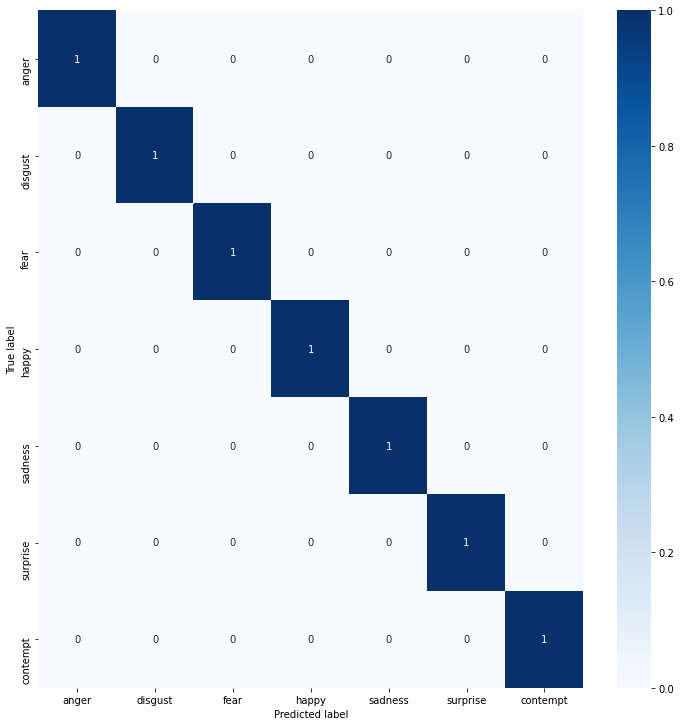

In [26]:
dict_emo = {
    0:'anger',
    1:'disgust',
    2:'fear',
    3:'happy',
    4:'sadness',
    5:'surprise',
    6:'contempt'
}

confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=target).numpy()
confusion_matrix = np.around(confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis], decimals=2)

confusion_matrix = pd.DataFrame(confusion_matrix,
                                index = dict_emo.values(), 
                                columns = dict_emo.values())

figure = plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [27]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 152x152
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (152, 152, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 152, 152, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
):
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    with tf.GradientTape() as tape:
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)

        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    heatmap = np.mean(last_conv_layer_output, axis=-1)

    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap
def preprocess_input(imgs):
    for idx, obj in enumerate(imgs):
        tmp = []
        tmp = cv2.cvtColor(obj, cv2.COLOR_RGB2GRAY)
        imgs[idx] = cv2.cvtColor(tmp, cv2.COLOR_GRAY2BGR)
    return imgs

In [37]:
img_size = (152, 152)

last_conv_layer_name = "C3"
classifier_layer_names = [
    "L4",
    "L5",
    "L6",
    "F0",
    "F7",
    "D0",
    "weight_decay_01",
    "dropout",
    "Prediction",
]

In [29]:
idx = -1

Emotion predict: fear
Emotion true: fear


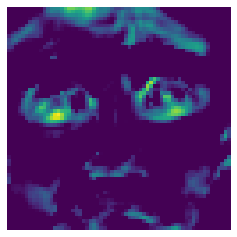

True

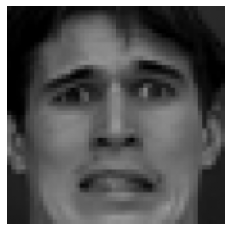

In [42]:
idx += 1
dict_emo = {
    0:'anger',
    1:'disgust',
    2:'fear',
    3:'happy',
    4:'sadness',
    5:'surprise',
    6:'contempt'
}

img_array = np.array([x_test[idx]])

preds = model.predict(img_array)
print("Emotion predict: {}\nEmotion true: {}".format(dict_emo[np.argmax(preds)], dict_emo[y_test[idx]]))

heatmap = make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
)

plt.matshow(heatmap)
plt.axis('off')
plt.show()
plt.imshow(x_test[idx])
plt.axis('off')

cv2.imwrite('img_test.jpg', x_test[idx]*255)


(152, 152, 3)


(-0.5, 151.5, 151.5, -0.5)

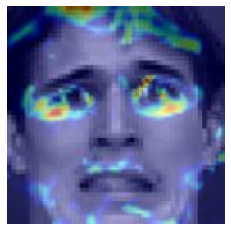

In [43]:
img = keras.preprocessing.image.load_img('/content/img_test.jpg')
img = keras.preprocessing.image.img_to_array(img)
img = cv2.resize(img, (152, 152),
                 interpolation = cv2.INTER_AREA)

heatmap = np.uint8(255 * heatmap)

jet = cm.get_cmap("jet")

jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

save_path = "gradcam.jpg"
superimposed_img.save(save_path)

# Display Grad CAM
gradcam_heatmap = cv2.imread(save_path)[:,:,::-1]
print(gradcam_heatmap.shape)
plt.imshow(gradcam_heatmap, cmap='gray')
plt.axis('off')